# Sample Python code for downloading GRACE times series at a point using the GRACE Tethys app

In [1]:
import requests
import datetime as dt
import matplotlib.pyplot as plt
import json

In [2]:
# This function will use a REST service to get a time series in JSON format for a specified lat/lon location
def get_grace_time_series(lat, lon):
    url = 'http://tethys.byu.edu/apps/grace/api/GetPointValues/?latitude=' + lat +'&longitude=' + lon
    res = requests.get(url).content
    return res

In [3]:
# Call the web service to the the JSON object in string format
lat ='20.7'
lon = '80.4'
json_string = get_grace_time_series(lat, lon)

In [4]:
json_string

b'{"values": [[1018915200000, -13.7], [1020988800000, -20.654], [1029499200000, 6.365], [1032134400000, 22.034], [1034769600000, 15.484], [1037404800000, 4.133], [1040040000000, -2.662], [1042718400000, -17.853], [1045267200000, -13.561], [1047816000000, -30.838], [1050451200000, -19.13], [1052654400000, -20.267], [1058356800000, -5.398], [1061035200000, 16.24], [1063670400000, 29.734], [1066305600000, 18.683], [1068940800000, 5.641], [1071576000000, 4.932], [1073476800000, -5.927], [1076976000000, -2.474], [1079438400000, -9.307], [1082073600000, -13.715], [1084708800000, -21.129], [1087344000000, -15.639], [1089979200000, -4.756], [1092657600000, 20.224], [1095292800000, 11.794], [1097928000000, 9.218], [1100563200000, 2.83], [1103198400000, -9.933], [1105876800000, -9.656], [1108425600000, -9.78], [1110974400000, -14.699], [1113609600000, -11.351], [1116244800000, -15.399], [1118880000000, -11.0], [1121515200000, 3.071], [1124193600000, 23.357], [1126828800000, 36.373], [11294640000

In [5]:
# Convert the JSON string to a python object
json_obj = json.loads(json_string)

In [6]:
json_obj

{'point': [20.7, 80.4],
 'values': [[1018915200000, -13.7],
  [1020988800000, -20.654],
  [1029499200000, 6.365],
  [1032134400000, 22.034],
  [1034769600000, 15.484],
  [1037404800000, 4.133],
  [1040040000000, -2.662],
  [1042718400000, -17.853],
  [1045267200000, -13.561],
  [1047816000000, -30.838],
  [1050451200000, -19.13],
  [1052654400000, -20.267],
  [1058356800000, -5.398],
  [1061035200000, 16.24],
  [1063670400000, 29.734],
  [1066305600000, 18.683],
  [1068940800000, 5.641],
  [1071576000000, 4.932],
  [1073476800000, -5.927],
  [1076976000000, -2.474],
  [1079438400000, -9.307],
  [1082073600000, -13.715],
  [1084708800000, -21.129],
  [1087344000000, -15.639],
  [1089979200000, -4.756],
  [1092657600000, 20.224],
  [1095292800000, 11.794],
  [1097928000000, 9.218],
  [1100563200000, 2.83],
  [1103198400000, -9.933],
  [1105876800000, -9.656],
  [1108425600000, -9.78],
  [1110974400000, -14.699],
  [1113609600000, -11.351],
  [1116244800000, -15.399],
  [1118880000000, -1

In [7]:
# Get the values part as a separate list
values = json_obj['values']

In [8]:
values

[[1018915200000, -13.7],
 [1020988800000, -20.654],
 [1029499200000, 6.365],
 [1032134400000, 22.034],
 [1034769600000, 15.484],
 [1037404800000, 4.133],
 [1040040000000, -2.662],
 [1042718400000, -17.853],
 [1045267200000, -13.561],
 [1047816000000, -30.838],
 [1050451200000, -19.13],
 [1052654400000, -20.267],
 [1058356800000, -5.398],
 [1061035200000, 16.24],
 [1063670400000, 29.734],
 [1066305600000, 18.683],
 [1068940800000, 5.641],
 [1071576000000, 4.932],
 [1073476800000, -5.927],
 [1076976000000, -2.474],
 [1079438400000, -9.307],
 [1082073600000, -13.715],
 [1084708800000, -21.129],
 [1087344000000, -15.639],
 [1089979200000, -4.756],
 [1092657600000, 20.224],
 [1095292800000, 11.794],
 [1097928000000, 9.218],
 [1100563200000, 2.83],
 [1103198400000, -9.933],
 [1105876800000, -9.656],
 [1108425600000, -9.78],
 [1110974400000, -14.699],
 [1113609600000, -11.351],
 [1116244800000, -15.399],
 [1118880000000, -11.0],
 [1121515200000, 3.071],
 [1124193600000, 23.357],
 [11268288000

In [9]:
# Parse the single 2D list into a pair of 1D lists. x=dates, y=values
x = []
y = []
for i in values:
    x.append(dt.datetime.utcfromtimestamp(i[0]/1000))
    y.append(i[1])

In [10]:
# ^Another way to do the same thing
# x=[x[0]/1000 for x in values]
# y=[y[1] for y in values]

# See this URL for more information:
# http://www.secnetix.de/olli/Python/list_comprehensions.hawk

In [11]:
x

[datetime.datetime(2002, 4, 16, 0, 0),
 datetime.datetime(2002, 5, 10, 0, 0),
 datetime.datetime(2002, 8, 16, 12, 0),
 datetime.datetime(2002, 9, 16, 0, 0),
 datetime.datetime(2002, 10, 16, 12, 0),
 datetime.datetime(2002, 11, 16, 0, 0),
 datetime.datetime(2002, 12, 16, 12, 0),
 datetime.datetime(2003, 1, 16, 12, 0),
 datetime.datetime(2003, 2, 15, 0, 0),
 datetime.datetime(2003, 3, 16, 12, 0),
 datetime.datetime(2003, 4, 16, 0, 0),
 datetime.datetime(2003, 5, 11, 12, 0),
 datetime.datetime(2003, 7, 16, 12, 0),
 datetime.datetime(2003, 8, 16, 12, 0),
 datetime.datetime(2003, 9, 16, 0, 0),
 datetime.datetime(2003, 10, 16, 12, 0),
 datetime.datetime(2003, 11, 16, 0, 0),
 datetime.datetime(2003, 12, 16, 12, 0),
 datetime.datetime(2004, 1, 7, 12, 0),
 datetime.datetime(2004, 2, 17, 0, 0),
 datetime.datetime(2004, 3, 16, 12, 0),
 datetime.datetime(2004, 4, 16, 0, 0),
 datetime.datetime(2004, 5, 16, 12, 0),
 datetime.datetime(2004, 6, 16, 0, 0),
 datetime.datetime(2004, 7, 16, 12, 0),
 datet

In [12]:
y

[-13.7,
 -20.654,
 6.365,
 22.034,
 15.484,
 4.133,
 -2.662,
 -17.853,
 -13.561,
 -30.838,
 -19.13,
 -20.267,
 -5.398,
 16.24,
 29.734,
 18.683,
 5.641,
 4.932,
 -5.927,
 -2.474,
 -9.307,
 -13.715,
 -21.129,
 -15.639,
 -4.756,
 20.224,
 11.794,
 9.218,
 2.83,
 -9.933,
 -9.656,
 -9.78,
 -14.699,
 -11.351,
 -15.399,
 -11.0,
 3.071,
 23.357,
 36.373,
 23.063,
 18.442,
 7.38,
 -3.288,
 -11.772,
 0.293,
 -3.951,
 -15.083,
 -20.285,
 -4.409,
 23.945,
 29.951,
 23.085,
 11.765,
 8.716,
 3.883,
 0.489,
 5.318,
 -10.088,
 -16.515,
 -9.921,
 3.433,
 14.075,
 18.372,
 13.308,
 6.221,
 -0.438,
 -4.416,
 -9.441,
 -12.499,
 -7.068,
 -18.967,
 -10.514,
 -3.674,
 8.948,
 13.499,
 5.727,
 0.275,
 -3.113,
 -7.316,
 -12.082,
 -17.196,
 -21.042,
 -18.202,
 -20.793,
 -4.172,
 4.479,
 15.783,
 8.072,
 4.563,
 2.244,
 -4.345,
 -5.138,
 -7.335,
 -8.434,
 -13.206,
 -15.11,
 -2.098,
 18.814,
 25.459,
 27.086,
 17.062,
 11.191,
 -0.232,
 -9.265,
 -2.462,
 -15.6,
 10.839,
 20.217,
 33.058,
 25.387,
 19.141,
 4.63

In [13]:
# Turn on inline mode

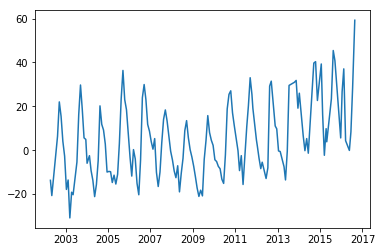

In [14]:
# Plot the values with matplotlib
fig= plt.plot(x, y)
plt.show()